Modern portfolio theory considers the Mean-Variance optimization problem, where capital should be allocated across investments that maximize expected return and minimimize volatility (variance in return).

If we assume that return = citation rates, then this kind of analysis will likely predict that optimality is just highest density. But it's worth actually visualizing our data first, so let's try that.

In [2]:
import scipy
import pandas as pd
import plotnine as pn
import numpy as np

import matplotlib.pyplot as plt
import warnings
import matplotlib.gridspec as gridspec


from tqdm import tqdm

In [4]:
df_an = pd.read_csv("../../analysis_data/transformed_all_data.csv")
df_an

,log_cpy_var,cpy_med,ref_med,year_med,density_bin,density_bin_z,cpy_med_z,ref_med_z,year_med_z,field,vectorizer
0,0.331658,4.000000,72.0,2010.0,19.726,-2.786181,-1.999242,0.581697,-1.042169,Physics,GPT2
1,0.246754,5.000000,82.0,2013.0,168.476,-2.514635,-1.115459,1.567625,0.625302,Physics,GPT2
2,0.293499,8.100000,79.5,2012.0,273.329,-2.323225,1.624270,1.321143,0.069478,Physics,GPT2
3,0.213240,5.705882,64.0,2011.0,358.318,-2.168076,-0.491612,-0.207045,-0.486346,Physics,GPT2
4,0.235837,8.000000,76.0,2011.0,422.550,-2.050819,1.535892,0.976068,-0.486346,Physics,GPT2
...,...,...,...,...,...,...,...,...,...,...,...
4495,0.366704,1.400000,23.0,2012.0,48.272,1.463766,0.865460,-0.988509,1.074936,Mathematics,SciBERT
4496,0.274933,1.625000,25.5,2013.0,48.803,1.540596,1.595976,0.205342,1.918022,Mathematics,SciBERT
4497,0.286359,1.333333,26.0,2014.0,49.584,1.653599,0.649011,0.444113,2.761109,Mathematics,SciBERT
4498,0.316263,1.571429,28.0,2014.0,50.476,1.782662,1.422044,1.399194,2.761109,Mathematics,SciBERT


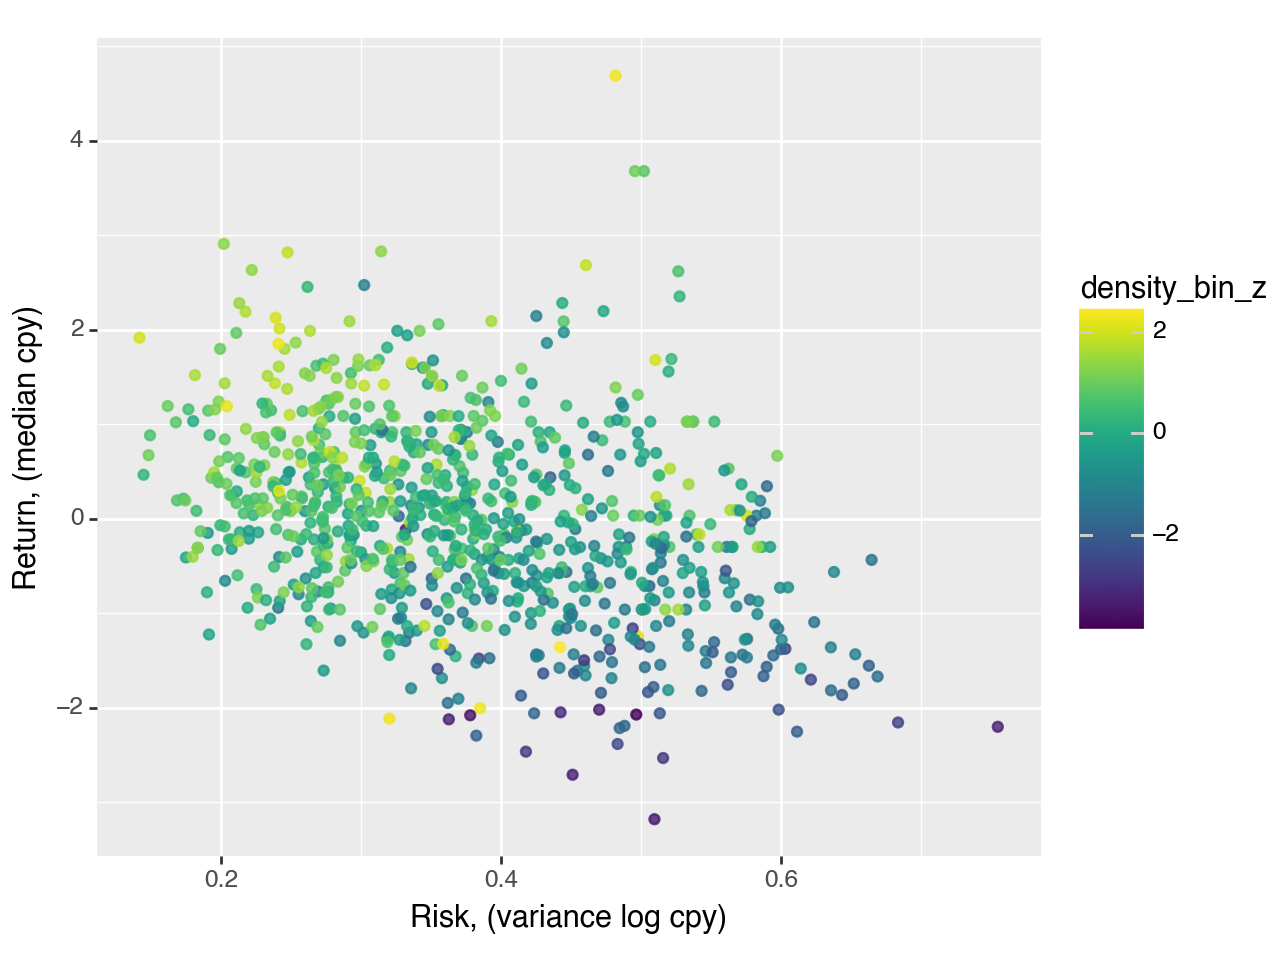

<Figure Size: (640 x 480)>

In [46]:
# Restrict to single vectorizer, (field)
df = df_an[df_an["vectorizer"] == "SciBERT"]

(
    pn.ggplot(
        df,
        pn.aes(
            x="log_cpy_var", # var return
            y="cpy_med_z", # median return
            color="density_bin_z", # 
        ),
    )
    + pn.geom_point()
    # + pn.facet_wrap("field")
    + pn.xlab("Risk, (variance log cpy)")
    + pn.ylab("Return, (median cpy)")
)

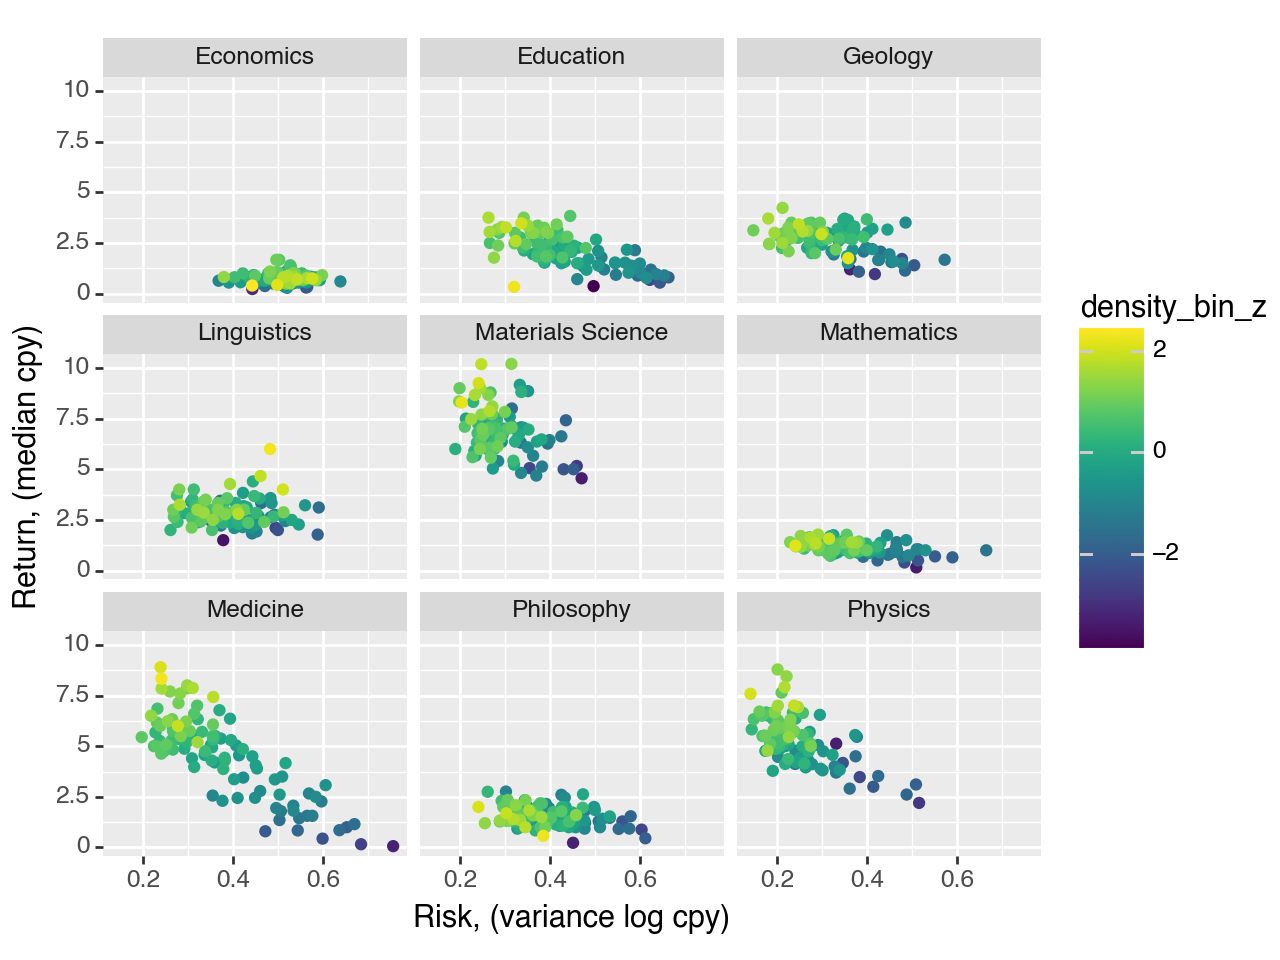

<Figure Size: (640 x 480)>

In [16]:
# Restrict to single vectorizer, (field)
df = df_an[df_an["vectorizer"] == "SciBERT"]

(
    pn.ggplot(
        df,
        pn.aes(
            x="log_cpy_var", # var return
            y="cpy_med", # median return
            color="density_bin_z", # 
        )
    )
    + pn.geom_point()
    + pn.facet_wrap("field")
    + pn.xlab("Risk, (variance log cpy)")
    + pn.ylab("Return, (median cpy)")
)

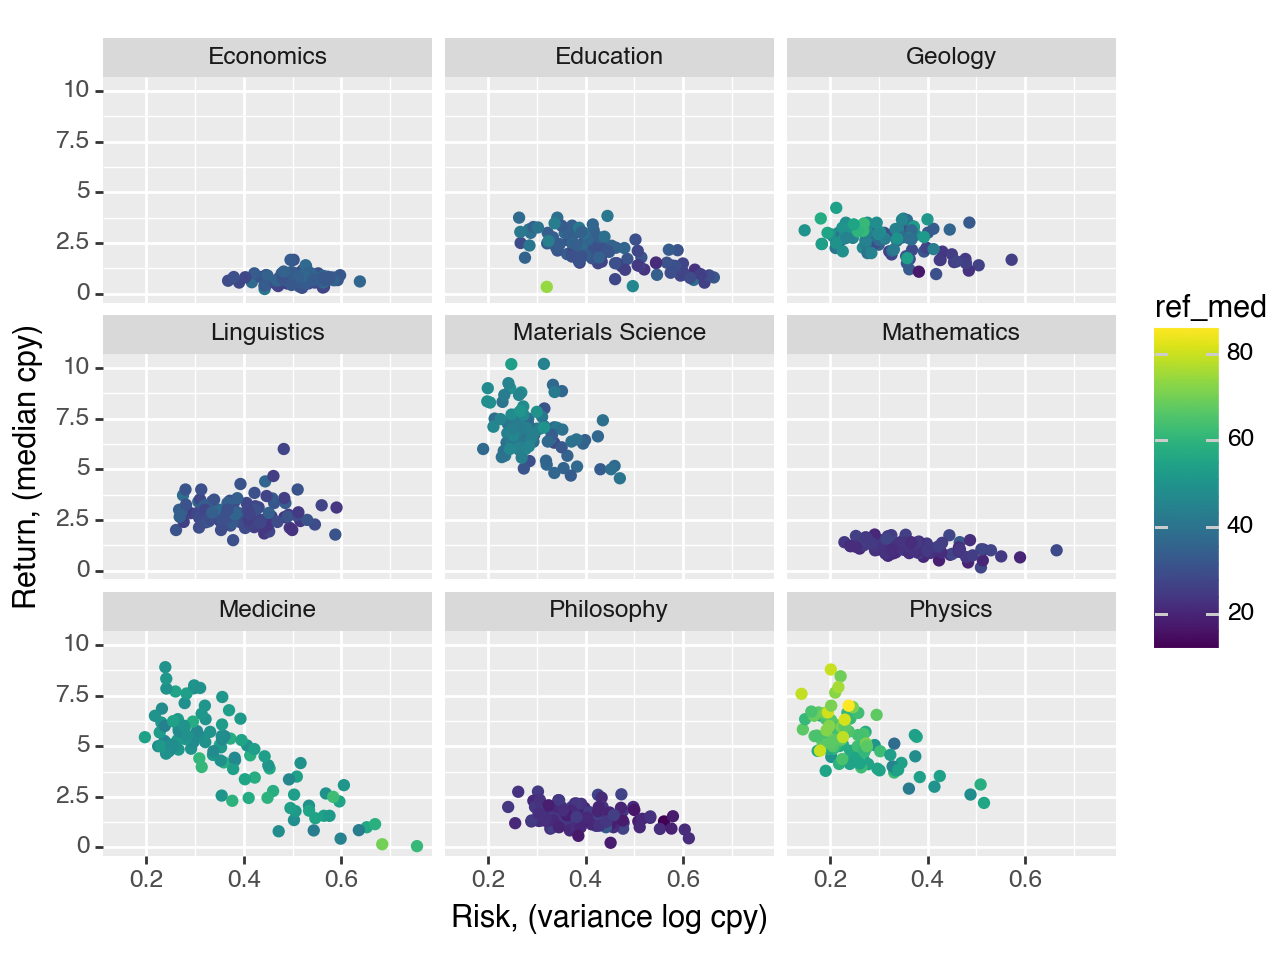

<Figure Size: (640 x 480)>

In [20]:

(
    pn.ggplot(
        df,
        pn.aes(
            x="log_cpy_var", # var return
            y="cpy_med", # median return
            color="ref_med", # using z-score weakens trends, so omit to be charitable
        )
    )
    + pn.geom_point()
    + pn.facet_wrap("field")
    + pn.xlab("Risk, (variance log cpy)")
    + pn.ylab("Return, (median cpy)")
)

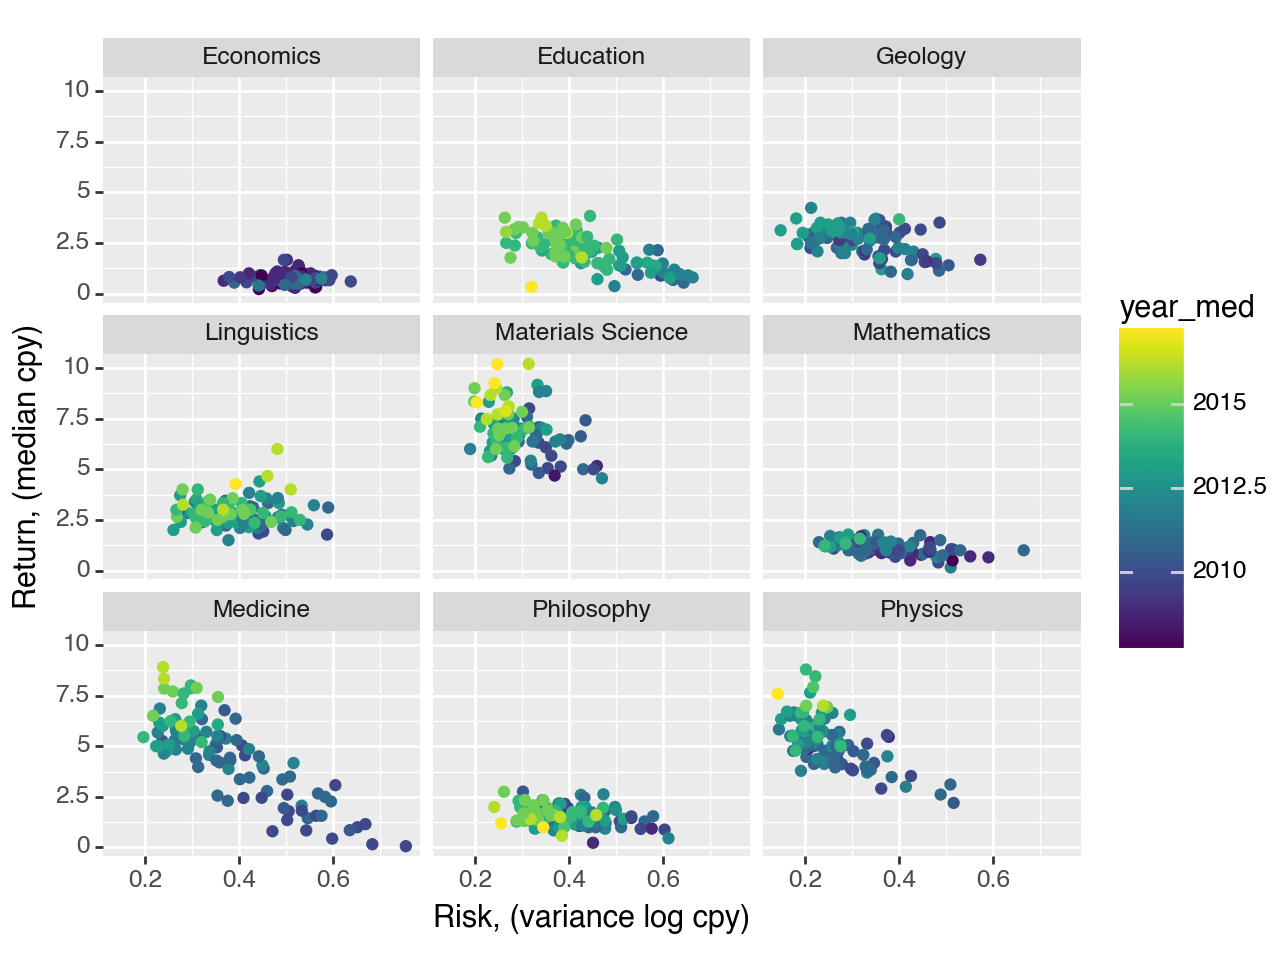

<Figure Size: (640 x 480)>

In [21]:

(
    pn.ggplot(
        df,
        pn.aes(
            x="log_cpy_var", # var return
            y="cpy_med", # median return
            color="year_med", # 
        )
    )
    + pn.geom_point()
    + pn.facet_wrap("field")
    + pn.xlab("Risk, (variance log cpy)")
    + pn.ylab("Return, (median cpy)")
)

In [ ]:
(
    pn.ggplot(
        df,
        pn.aes(
            x="log_cpy_var", # var return
            y="cpy_med", # median return
            color="density_bin_z", # 
        )
    )
    + pn.geom_point()
    + pn.facet_wrap("field")
    + pn.xlab("Risk, (variance log cpy)")
    + pn.ylab("Return, (median cpy)")
)

Can we apply some kind of permutation test? If we shuffle the joint observations of mean-variance, are the empirical observations 'more efficient' than shuffled? It's unclear to me yet that this shuffling could respect the assumptions of portfolio theory...

In [30]:
import random
def shuffle_obs(data: pd.DataFrame) -> pd.DataFrame:

    x = np.copy(data["log_cpy_var"].values)
    y = np.copy(data["cpy_med"].values)

    random.shuffle(x)
    random.shuffle(y)

    data_shuffled = data.copy()
    data_shuffled["log_cpy_var"] = x
    data_shuffled["cpy_med"] = y

    return data_shuffled

,log_cpy_var,cpy_med,ref_med,year_med,density_bin,density_bin_z,cpy_med_z,ref_med_z,year_med_z,field,vectorizer
3600,0.599465,6.336364,38.5,2010.0,22.449,-3.188766,-0.113691,-2.846307,-1.318254,Physics,SciBERT
3601,0.222693,0.700000,55.5,2010.5,24.827,-2.720007,-2.529947,-0.752529,-0.974063,Physics,SciBERT
3602,0.398121,1.261364,53.5,2011.0,26.451,-2.399879,-1.477164,-0.998856,-0.629871,Physics,SciBERT
3603,0.578998,1.000000,53.5,2010.5,27.506,-2.191914,-0.899869,-0.998856,-0.974063,Physics,SciBERT
3604,0.386639,2.083333,50.0,2012.0,28.452,-2.005436,-1.869679,-1.429928,0.058513,Physics,SciBERT
...,...,...,...,...,...,...,...,...,...,...,...
4495,0.387740,2.809091,23.0,2012.0,48.272,1.463766,0.865460,-0.988509,1.074936,Mathematics,SciBERT
4496,0.335995,3.783333,25.5,2013.0,48.803,1.540596,1.595976,0.205342,1.918022,Mathematics,SciBERT
4497,0.623883,1.773810,26.0,2014.0,49.584,1.653599,0.649011,0.444113,2.761109,Mathematics,SciBERT
4498,0.449957,5.200000,28.0,2014.0,50.476,1.782662,1.422044,1.399194,2.761109,Mathematics,SciBERT


In [32]:
df_ = df.copy()
df_["kind"] = "observed"
df_shuffled = shuffle_obs(df)
df_shuffled["kind"] = "permuted"

df_compare = pd.concat([df_, df_shuffled])

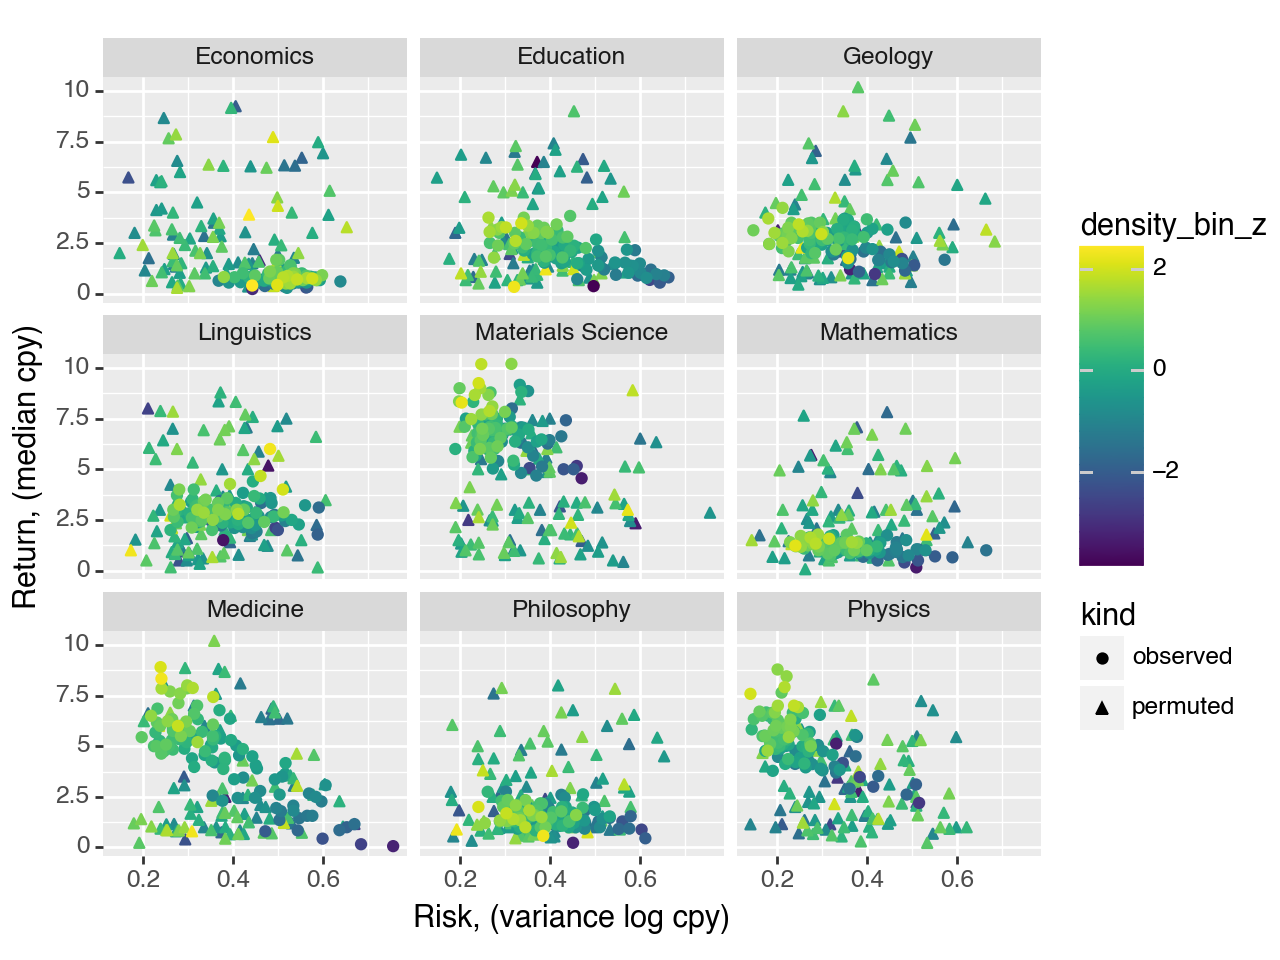

<Figure Size: (640 x 480)>

In [34]:
# No immediate trend

(
    pn.ggplot(
        df_compare,
        pn.aes(
            x="log_cpy_var", # var return
            y="cpy_med", # median return
            color="density_bin_z", 
            shape = "kind",
        )
    )
    + pn.geom_point()
    + pn.facet_wrap("field")
    + pn.xlab("Risk, (variance log cpy)")
    + pn.ylab("Return, (median cpy)")
)

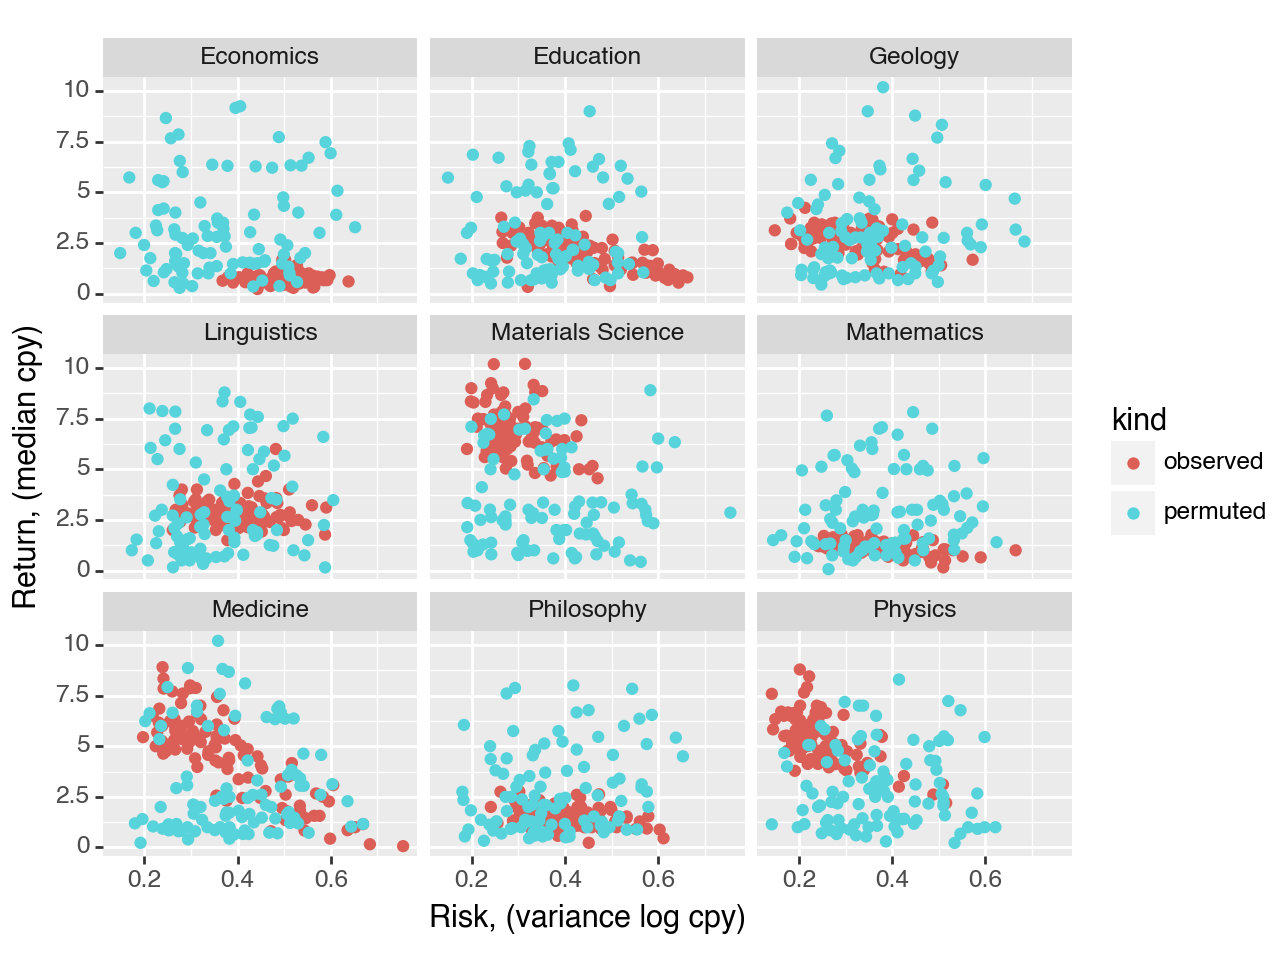

<Figure Size: (640 x 480)>

In [35]:
# Restrict to single vectorizer, (field)

(
    pn.ggplot(
        df_compare,
        pn.aes(
            x="log_cpy_var", # var return
            y="cpy_med", # median return
            color="kind", 
        )
    )
    + pn.geom_point()
    + pn.facet_wrap("field")
    + pn.xlab("Risk, (variance log cpy)")
    + pn.ylab("Return, (median cpy)")
)